#***AWS_Honeypot Analysis***

In [7]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv("AWS_Honeypot_marx-geo.csv")
df.head()

,datetime,host,src,proto,type,spt,dpt,srcstr,cc,country,locale,localeabbr,postalcode,latitude,longitude,Unnamed: 15
0,3/3/13 21:53,groucho-oregon,1032051418,TCP,NaN,6000.0,1433.0,61.131.218.218,CN,China,Jiangxi Sheng,36,NaN,28.5500,115.9333,NaN
1,3/3/13 21:57,groucho-oregon,1347834426,UDP,NaN,5270.0,5060.0,80.86.82.58,DE,Germany,NaN,NaN,NaN,51.0000,9.0000,NaN
2,3/3/13 21:58,groucho-oregon,2947856490,TCP,NaN,2489.0,1080.0,175.180.184.106,TW,Taiwan,Taipei,NaN,NaN,25.0392,121.5250,NaN
3,3/3/13 21:58,groucho-us-east,841842716,UDP,NaN,43235.0,1900.0,50.45.128.28,US,United States,Oregon,OR,97124,45.5848,-122.9117,NaN
4,3/3/13 21:58,groucho-singapore,3587648279,TCP,NaN,56577.0,80.0,213.215.43.23,FR,France,NaN,NaN,NaN,48.8600,2.3500,NaN


#####This code is converting the dates in a DataFrame column named 'datetime' into separate year, month, day, time, and hour columns, and then dropping unnecessary columns.

In [9]:
month_list = ['Jan.', 'Feb.', 'Mar.', 'Apr.', 'May', 'June', 'July', 'Aug.', 'Sept.', 'Oct.', 'Nov.', 'Dec.']
attack_date = {"year": [], "month": [], "day": [], "time": [], "hour": []}

for d_date in df['datetime']:
    d_date = d_date.split('/')
    mon = d_date[0]
    day = d_date[1] 

    year_time = d_date[2].split(' ')
    year = year_time[0]
    time = year_time[1]
        
    attack_date["year"].append(year)
    attack_date["month"].append(month_list[int(mon) + 1])
    attack_date["day"].append(day)
    attack_date["time"].append(time)
    attack_date["hour"].append(f"{time.split(':')[0]}h")

df["year"] = attack_date["year"]
df["month"] = attack_date["month"]
df["day"] = attack_date["day"]
df["time"] = attack_date["time"]
df["hour"] = attack_date["hour"]

df = df.drop('type', axis=1)
df = df.drop('Unnamed: 15', axis=1)
df.head()

,datetime,host,src,proto,spt,dpt,srcstr,cc,country,locale,localeabbr,postalcode,latitude,longitude,year,month,day,time,hour
0,3/3/13 21:53,groucho-oregon,1032051418,TCP,6000.0,1433.0,61.131.218.218,CN,China,Jiangxi Sheng,36,NaN,28.5500,115.9333,13,May,3,21:53,21h
1,3/3/13 21:57,groucho-oregon,1347834426,UDP,5270.0,5060.0,80.86.82.58,DE,Germany,NaN,NaN,NaN,51.0000,9.0000,13,May,3,21:57,21h
2,3/3/13 21:58,groucho-oregon,2947856490,TCP,2489.0,1080.0,175.180.184.106,TW,Taiwan,Taipei,NaN,NaN,25.0392,121.5250,13,May,3,21:58,21h
3,3/3/13 21:58,groucho-us-east,841842716,UDP,43235.0,1900.0,50.45.128.28,US,United States,Oregon,OR,97124,45.5848,-122.9117,13,May,3,21:58,21h
4,3/3/13 21:58,groucho-singapore,3587648279,TCP,56577.0,80.0,213.215.43.23,FR,France,NaN,NaN,NaN,48.8600,2.3500,13,May,3,21:58,21h


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 451581 entries, 0 to 451580
Data columns (total 19 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   datetime    451581 non-null  object 
 1   host        451581 non-null  object 
 2   src         451581 non-null  int64  
 3   proto       451581 non-null  object 
 4   spt         406770 non-null  float64
 5   dpt         406770 non-null  float64
 6   srcstr      451581 non-null  object 
 7   cc          447985 non-null  object 
 8   country     447947 non-null  object 
 9   locale      342112 non-null  object 
 10  localeabbr  331705 non-null  object 
 11  postalcode  86478 non-null   object 
 12  latitude    448112 non-null  float64
 13  longitude   448153 non-null  float64
 14  year        451581 non-null  object 
 15  month       451581 non-null  object 
 16  day         451581 non-null  object 
 17  time        451581 non-null  object 
 18  hour        451581 non-null  object 
dtypes:

##**Bar Plot**
* The Python function creates a horizontal bar plot using Seaborn library.
* The function removes top, right, and left spines of the subplot using Matplotlib library's spines() method.
* It creates a filtered DataFrame containing counts of each unique value in the specified column of df.
* The DataFrame is sorted by the count in descending order using Pandas library's value_counts() and reset_index() methods.
* If top_filter is specified, the DataFrame is filtered to show only the top top_filter items.
* A horizontal bar plot is created using Seaborn library, with counts on x-axis and specified column of df on y-axis.
* The color palette used for the bars is 'cool'.
* The tick parameters for both x and y axes are set to display and be styled according to the inputs given to them.
* The function sets x and y labels for the subplot, adds a white line across the subplot, sets the title of the figure, and displays the plot using Matplotlib library's show() method.

In [11]:
def bar_plot_data(df: dict, field: str, subtitle: str, figsize=(5, 4), top_filter=15):
    fig, ax1 = plt.subplots(figsize=figsize, dpi=100)
    
    for spline in ['top', 'right', 'left']:
        ax1.spines[spline].set_visible(False)
          
    df_filter = df[field].value_counts().rename_axis(field).reset_index(name='counts')
    if top_filter:
        df_filter = df_filter.head(top_filter)
    sns.barplot(data=df_filter, palette='cool', x='counts', y=field)
    ax1.tick_params(axis='both', which='both', labelsize=12, bottom=True, left=False)
    ax1.set_xlabel(f'count', fontsize=13, color = '#333F4B')
    ax1.set_ylabel(f'{field}', fontsize=13, color = '#333F4B')

    plt.plot(color="white", lw=3)
    fig.suptitle(subtitle, fontsize=18)
    plt.show()

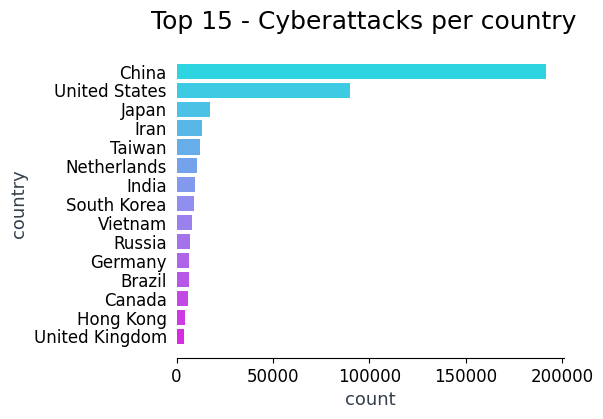

In [12]:
bar_plot_data(df, 'country', 'Top 15 - Cyberattacks per country')

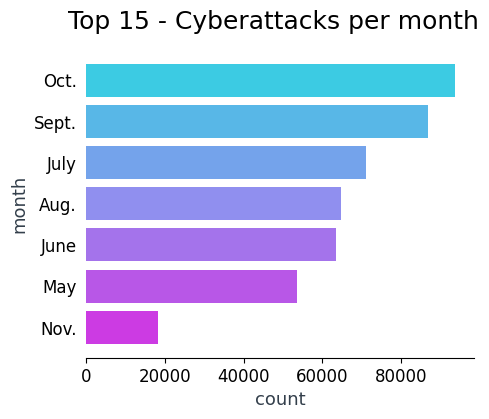

In [13]:
bar_plot_data(df, 'month', 'Top 15 - Cyberattacks per month')

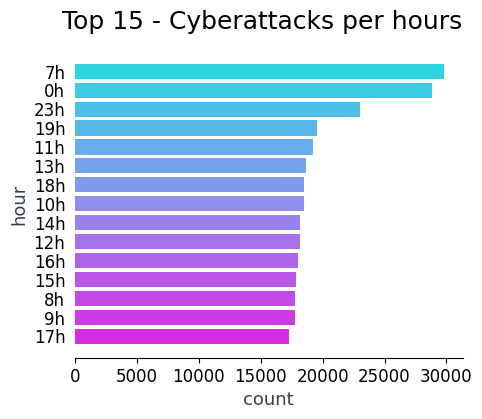

In [14]:
bar_plot_data(df, 'hour', 'Top 15 - Cyberattacks per hours')

##**Pie Plot**

* A Python function that creates a pie chart using the Matplotlib library.
* It takes a dictionary with data to be plotted, the name of the column to be plotted and a title string as input parameters.
* The function creates a figure with one subplot using the subplots() method of the Matplotlib library.
* A color palette is created for the pie chart using the color_palette() method of the Seaborn library.
* A filtered DataFrame containing the counts of each unique value in the specified column of df is created.
* The function creates a pie chart using the Matplotlib library with counts as values, specified column of df as labels, and the color palette as the colors.
* The function sets the title of the figure, adds a white line across the subplot, and displays the plot using the show() method of the Matplotlib library.

In [15]:
def get_pie_plot_count(df: dict, field: str, subtitle: str):
    fig, ax1 = plt.subplots(figsize=(10, 6), dpi=100)
    colors = sns.color_palette('cool')
    df_filter = df[field].value_counts().rename_axis(field).reset_index(name='counts')
    ax1.tick_params(axis='both', which='both', labelsize=12, bottom=True, left=False)
    plt.pie(df_filter['counts'], colors=colors, labels=df_filter[field], autopct = '%0.0f%%', 
            startangle=90,  textprops={'fontsize': 14})
    
    plt.plot(color="white", lw=3)
    fig.suptitle(subtitle, fontsize=18)
    plt.show()

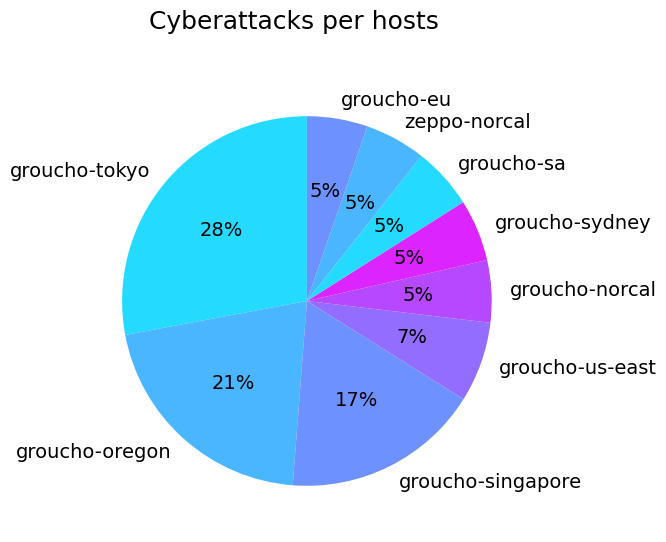

In [16]:
get_pie_plot_count(df, 'host', 'Cyberattacks per hosts')

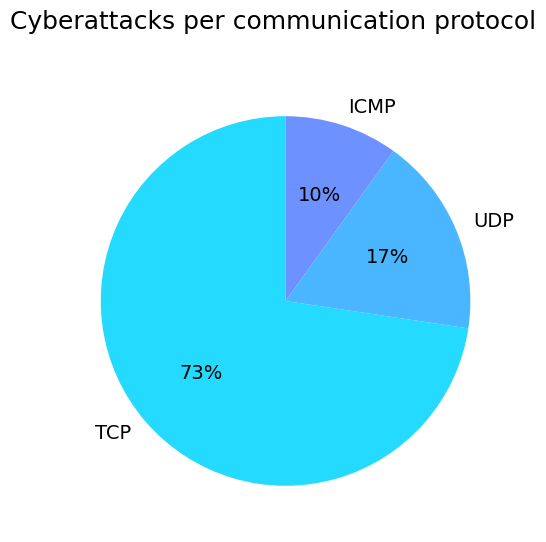

In [17]:
get_pie_plot_count(df, 'proto', 'Cyberattacks per communication protocol')

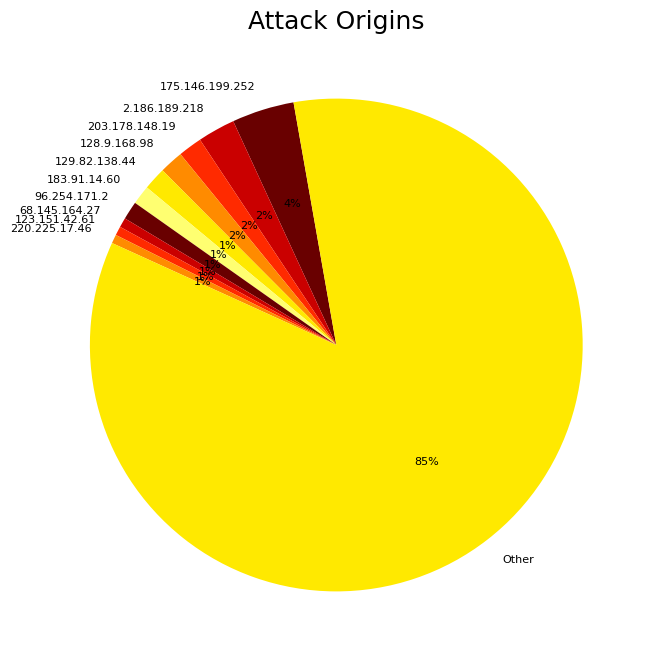

In [18]:
dt = df
origin_counts = dt['srcstr'].value_counts()
top_origins = origin_counts[:10]
other_count = origin_counts[10:].sum()
top_origins['Other'] = other_count

fig, ax1 = plt.subplots(figsize=(10, 8), dpi=100)
colors = sns.color_palette('hot')
plt.pie(top_origins.values, colors=colors, labels=top_origins.index, autopct = '%0.0f%%', 
            startangle=100,  textprops={'fontsize': 8})
    
plt.plot(color="white", lw=3)
plt.title('Attack Origins', fontsize=18)
plt.show()

##**Histogram**

* This function generates a histogram for one or more fields in a pandas DataFrame. For each field, it computes the mean, median, and mode of the data, and plots vertical lines on the histogram at the corresponding values. 
* The function also removes the top, right, and left spines of the plot to improve its aesthetic.

* The function takes two arguments:

    1.  df: a pandas DataFrame containing the data
    2.   fields: a list of strings representing the column names for which histograms are to be generated


  
  

In [19]:
def get_histplot_central_tendency(df: dict, fields: list):
    colors = sns.color_palette('cool')
    for field in fields:
        f, (ax1) = plt.subplots(figsize=(10, 5), dpi=100)
        v_dist_1 = df[field].values
        
        for spline in ['top', 'right', 'left']:
            ax1.spines[spline].set_visible(False)
        
        sns.histplot(v_dist_1, ax=ax1, palette=colors, kde=True)

        mean=df[field].mean()
        median=df[field].median()
        mode=df[field].mode().values[0]

        ax1.axvline(mean, color='r', linestyle='--', label="Mean")
        ax1.axvline(median, color='g', linestyle='-', label="Mean")
        ax1.axvline(mode, color='b', linestyle='-', label="Mode")
        ax1.tick_params(axis='both', which='both', labelsize=12, bottom=True, left=False)
        ax1.set_xlabel(f'{field}', fontsize=13, color = '#333F4B')
        ax1.set_ylabel(f'count', fontsize=13, color = '#333F4B')
        ax1.legend()
        plt.grid(False)
        plt.plot(color="white", lw=3)
        f.suptitle(f"Representation Histogram for {field}", fontsize=18)

<ipython-input-19-cac7b9fd69c8>:10: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(v_dist_1, ax=ax1, palette=colors, kde=True)
<ipython-input-19-cac7b9fd69c8>:10: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(v_dist_1, ax=ax1, palette=colors, kde=True)


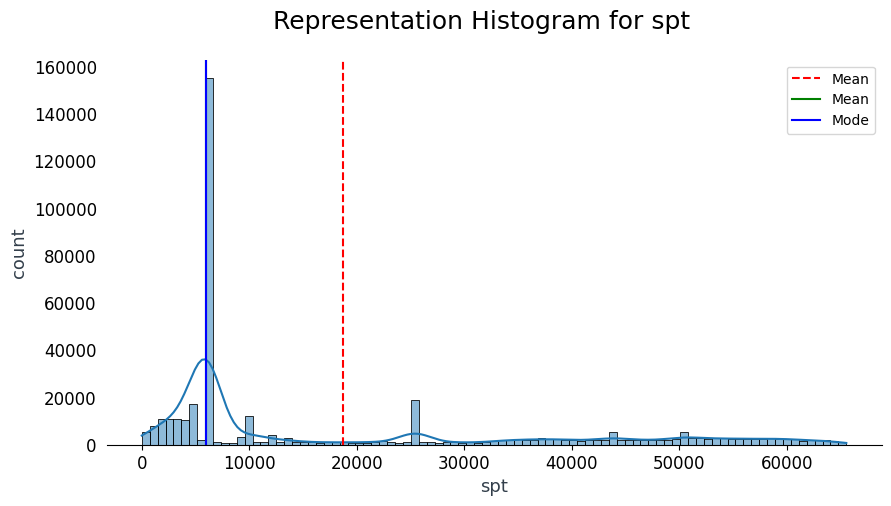

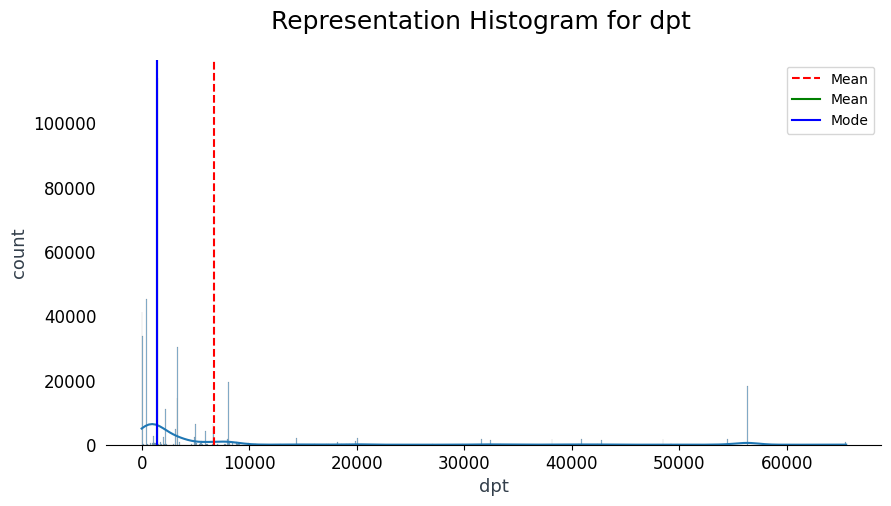

In [20]:
get_histplot_central_tendency(df, ['spt', 'dpt'])

##**Frequency Plot**

* The time column of the input dataframe df is extracted and converted to a Pandas datetime object.
* The time column is set as the index of the dataframe.
* The number of attacks per minute is calculated by resampling the data at one-minute intervals and getting the size of each interval.
* A line chart of the number of attacks per minute is plotted using plt.plot.
* The title, x-label, and y-label of the plot are set using plt.title, plt.xlabel, and plt.ylabel, respectively.
* The x-axis labels are rotated by 45 degrees using plt.gcf().autofmt_xdate().
* The plot is displayed using plt.show().

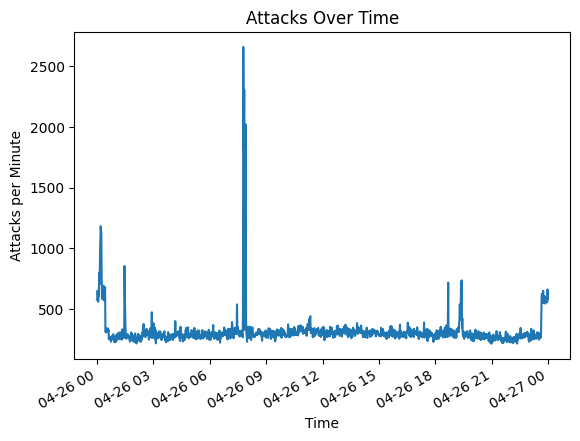

In [21]:
dt = pd.DataFrame(df['time'])
dt['time'] = pd.to_datetime(dt['time'])
dt.set_index('time', inplace=True)

# Calculate the number of attacks per minute
attacks_per_minute = dt.resample('T').size()

# Create a line chart of attack times
plt.plot(attacks_per_minute.index, attacks_per_minute.values)
plt.title('Attacks Over Time')
plt.xlabel('Time')
plt.ylabel('Attacks per Minute')

# Rotate x-axis labels by 45 degrees
plt.gcf().autofmt_xdate()

plt.show()

##**Heat Map**

* This code creates a folium map object and uses the HeatMap plugin to create a heatmap of cyber attacks based on their geographical coordinates (latitude and longitude).

* The input data is a DataFrame 'df' that contains columns for latitude and longitude. The code first selects these two columns and stores them in a new DataFrame called 'attack'. Then, it fills in any missing values in the latitude and longitude columns with 0.

* Next, the code creates a folium map object called 'World', centered at coordinates [0,0] with a zoom level of 2. It then uses the HeatMap plugin to generate a heatmap layer on the map, using the 'attack' DataFrame as input and setting the radius of each data point to 16.

* Finally, the code prints a string indicating that the map shows the top cyberattacks by country, although this information is not explicitly shown on the map itself.

In [22]:
import folium
from folium.plugins import HeatMap

attack= df[['latitude','longitude']]
attack.latitude.fillna(0, inplace = True)
attack.longitude.fillna(0, inplace = True) 

World =folium.Map(location=[0,0],zoom_start=2)
HeatMap(data=attack, radius=16).add_to(World)

print('Top cyberattacks by country')
World

Output hidden; open in https://colab.research.google.com to view.

##**Networkx Graph**

* This code creates a graph using the networkx library in Python to visualize the source IP addresses and the protocols used in the cyber attacks. 
* It creates a graph G with a single node named 'groucho-tokyo' and iterates through the srcstr and proto columns of the df_filter dataframe to add nodes and edges to the graph. 
* If the IP address is not already present in the ip_listx list, it is added to the graph as a new node, and an edge is added between the 'groucho-oregon' node and the new node representing the IP address. 
* The edge color is determined based on the protocol used in the attack, with TCP being green, UDP being red, and ICMP being orange. 
* Finally, the graph is drawn using the nx.draw() function, with node labels displayed and edge colors set according to protocol.

In [23]:
import networkx as nx
df_filter1 = df[(df.host == "groucho-tokyo") & (df.month == "May") & (df.hour == "20h")]

G = nx.Graph()
G.add_node('groucho-tokyo', color='red')

ip_listx = []
edge_color = []
for ip, proto in zip(df_filter1['srcstr'], df_filter1['proto']):
    if ip not in ip_listx:
        if 'TCP' == proto:
            edge_color.append('green')
        if 'UDP' == proto:
            edge_color.append('red')
        if 'ICMP' == proto:
            edge_color.append('orange')
        G.add_node(ip)
        ip_listx.append(ip)

for ip in ip_listx:
    G.add_edge('groucho-tokyo', ip)
fig = plt.figure(1, figsize=(25, 25), dpi=100)
print('TPC == green\nUDP == red\nICMP == orange')
nx.draw(G, with_labels=True, font_weight='normal', edge_color=edge_color, arrowsize=30, arrowstyle='fancy')

Output hidden; open in https://colab.research.google.com to view.

* The code creates a graph using NetworkX and Matplotlib to visualize the connections between IP addresses and countries based on a dataset of cyberattacks.
* It initializes an empty graph called Gx using the Graph() method of NetworkX and adds a node for 'groucho-oregon'.
* It creates lists to store the countries, IP addresses, and edge colors.
* It iterates through the rows of a filtered dataframe called df_filter, and adds nodes and edges to the graph if they are not already present.
* It also adds edges between 'groucho-oregon' and each country in the country_list.
* The code sets options for the graph such as node color, size, and linewidths, and uses the spring_layout() method of NetworkX to compute the positions of the nodes.
* Finally, it draws the graph using the draw() method of NetworkX with various options to control the appearance of the graph and adds labels to each node using the text() function of Matplotlib.

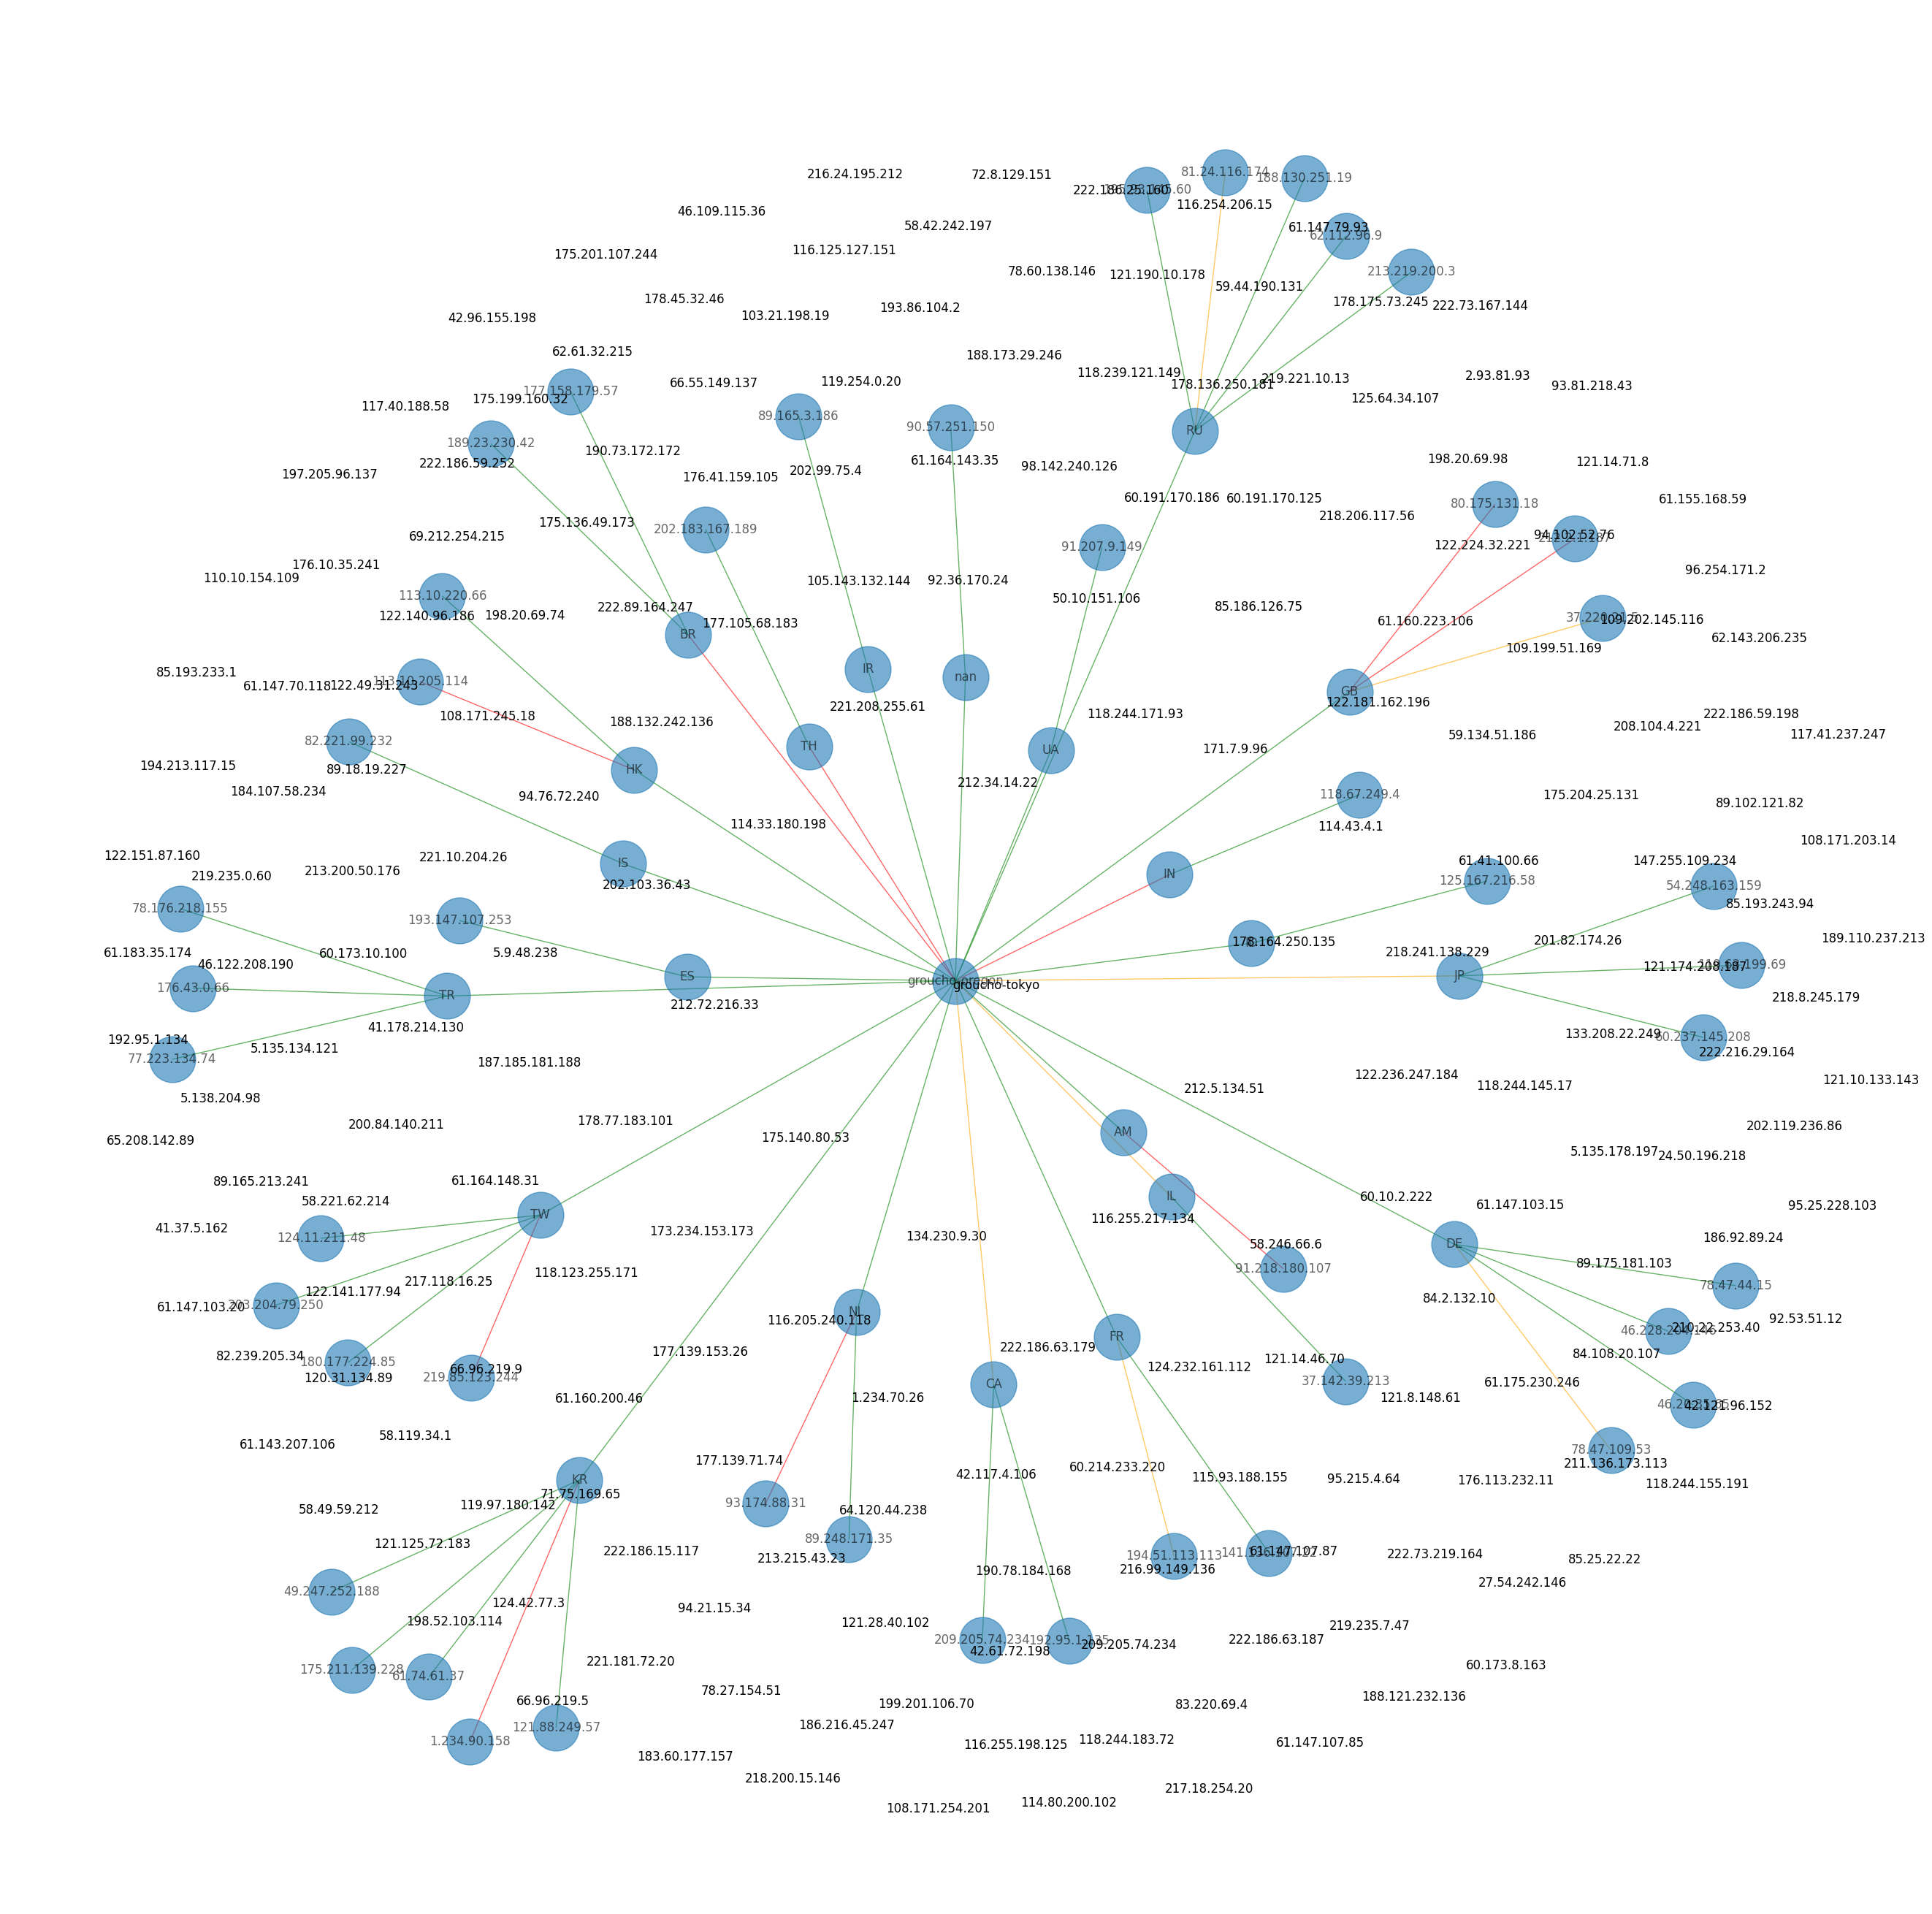

In [24]:
df_filter = df[(df.host == "groucho-oregon") & (df.month == "May") & (df.hour == "20h")]

from matplotlib.pyplot import figure, text

Gx = nx.Graph()
Gx.add_node('groucho-oregon')

country_list = []
ip_list = []
edge_color = []
for country, ip, proto in zip(df_filter['cc'], df_filter['srcstr'], df_filter['proto']):
    if country != 'CN' and country != 'US':
        if country not in country_list:
            Gx.add_node(country)
            country_list.append(country)

        if ip not in ip_list:
            if 'TCP' == proto:
                edge_color.append('green')
            if 'UDP' == proto:
                edge_color.append('red')
            if 'ICMP' == proto:
                edge_color.append('orange')

            Gx.add_node(ip)
            Gx.add_edge(country, ip)
            ip_list.append(ip)

        
for country in country_list:
    Gx.add_edge('groucho-oregon', country)
    
options = {
    "node_color": "black",
    "node_size": 50,
    "linewidths": 0,
    "width": 0.1,
}


pos = nx.spring_layout(G)
d = dict(G.degree)
fig = plt.figure(figsize=(26, 26), dpi=100)
nx.draw(Gx, alpha=0.6, node_size=2050, with_labels=True, font_weight='normal', 
        edge_color=edge_color, arrowsize=30, arrowstyle='fancy')

for node, (x, y) in pos.items():
    text(x, y, node, fontsize=12)

#**Principal Component Analysis** 

####PCA is a technique used for dimensionality reduction and feature extraction by transforming the original dataset into a new set of linearly uncorrelated variables called principal components. The first principal component has the highest variance and each subsequent component has the highest variance under the constraint of being orthogonal to the previous components.

####The number of principal components to keep is usually determined by the amount of variance explained by each component. In this case, n_components=2 is specified, which means the data is transformed into a new two-dimensional space spanned by the first two principal components.

####The transformed data is visualized using a scatter plot, where the x-axis corresponds to the first principal component and the y-axis corresponds to the second principal component. The plot shows how the data is distributed in the new two-dimensional space.



###**Preprocessing**

* This code loads the dataset from the df DataFrame and preprocesses the data for the principal component analysis (PCA). 
* It drops the 'datetime', 'srcstr', 'localeabbr', 'time', 'hour', and 'postalcode' columns from the dataset as they are not useful for the analysis.
* It also encodes the categorical variables using LabelEncoder() from the sklearn.preprocessing module. 
* The resulting dataset containing only the features is stored in the X DataFrame. 
* Finally, it drops the rows containing null values using the dropna() method and returns the first few rows of the processed dataset using the head() method.


In [25]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load the dataset
d = df
d = d.drop('datetime', axis=1)

from sklearn import preprocessing
le = preprocessing.LabelEncoder()

d.host = le.fit_transform(d.host)
d.proto = le.fit_transform(d.proto)
d.cc = le.fit_transform(d.cc)
d.country = le.fit_transform(d.country)
d.locale = le.fit_transform(d.locale)
d.month = le.fit_transform(d.month)

# Separate the features from the target variable
d = d.drop('srcstr', axis=1)
d = d.drop('localeabbr', axis=1)
d = d.drop('time', axis=1)
d = d.drop('hour', axis=1)
d = d.drop('postalcode', axis=1)
X = d
X=X.dropna()
X.head()

,host,src,proto,spt,dpt,cc,country,locale,latitude,longitude,year,month,day
0,2,1032051418,1,6000.0,1433.0,34,36,390,28.5500,115.9333,13,3,3
1,2,1347834426,2,5270.0,5060.0,41,57,1179,51.0000,9.0000,13,3,3
2,2,2947856490,1,2489.0,1080.0,159,157,1020,25.0392,121.5250,13,3,3
3,7,841842716,2,43235.0,1900.0,163,169,681,45.5848,-122.9117,13,3,3
4,4,3587648279,1,56577.0,80.0,54,54,1179,48.8600,2.3500,13,3,3


In [26]:
X.isnull().sum()

host         0
src          0
proto        0
spt          0
dpt          0
cc           0
country      0
locale       0
latitude     0
longitude    0
year         0
month        0
day          0
dtype: int64

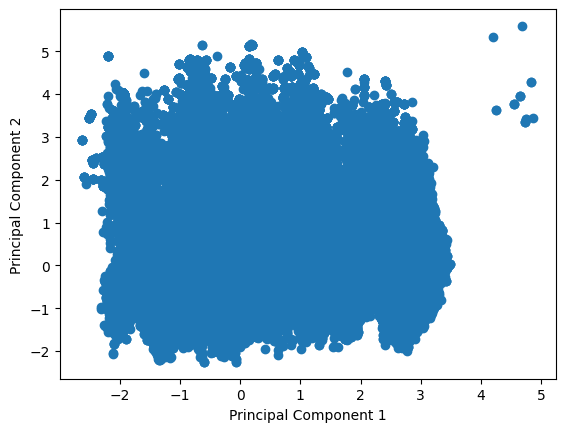

In [27]:
# Standardize the feature values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Visualize the transformed data
plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [28]:
t = df
t = t.drop('datetime', axis=1)
t = t.drop('srcstr', axis=1)
t = t.drop('localeabbr', axis=1)
t = t.drop('time', axis=1)
t = t.drop('hour', axis=1)
t = t.drop('postalcode', axis=1)

from sklearn import preprocessing
le = preprocessing.LabelEncoder()

t.host = le.fit_transform(t.host)
t.proto = le.fit_transform(t.proto)
t.cc = le.fit_transform(t.cc)
t.locale = le.fit_transform(t.locale)
t.month = le.fit_transform(t.month)
t = t.dropna()
t.head()

,host,src,proto,spt,dpt,cc,country,locale,latitude,longitude,year,month,day
0,2,1032051418,1,6000.0,1433.0,34,China,390,28.5500,115.9333,13,3,3
1,2,1347834426,2,5270.0,5060.0,41,Germany,1179,51.0000,9.0000,13,3,3
2,2,2947856490,1,2489.0,1080.0,159,Taiwan,1020,25.0392,121.5250,13,3,3
3,7,841842716,2,43235.0,1900.0,163,United States,681,45.5848,-122.9117,13,3,3
4,4,3587648279,1,56577.0,80.0,54,France,1179,48.8600,2.3500,13,3,3


* This code first imports the required libraries for performing PCA visualization and 3D plot visualization. 
* Then, it selects the columns spt, dpt, latitude, and longitude for PCA visualization from the dataframe t. 
* The selected columns are standardized using StandardScaler(), and PCA is performed on them with 2 components using PCA(n_components=2). 
* Another PCA is performed with 3 components using PCA(n_components=3) for 3D plot visualization. 
* The unique values of the country column are identified and a color map is created using the plt.cm.get_cmap() function. 
* The transformed data is then plotted using scatter plot with each data point colored based on its corresponding country value. 
* Finally, the plot labels, title, legends, and colorbar are set using the set_xlabel(), set_ylabel(), set_title(), legend(), and colorbar() functions of the matplotlib.pyplot library. 
* The resulting plot is displayed using the plt.show() function.


<ipython-input-29-446ffe302448>:27: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = plt.cm.get_cmap('hsv', len(country_values))
<ipython-input-29-446ffe302448>:33: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(A_pca_2d[mask, 0], A_pca_2d[mask, 1], c=color_map(i), marker='o', label=country)
<ipython-input-29-446ffe302448>:44: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Color

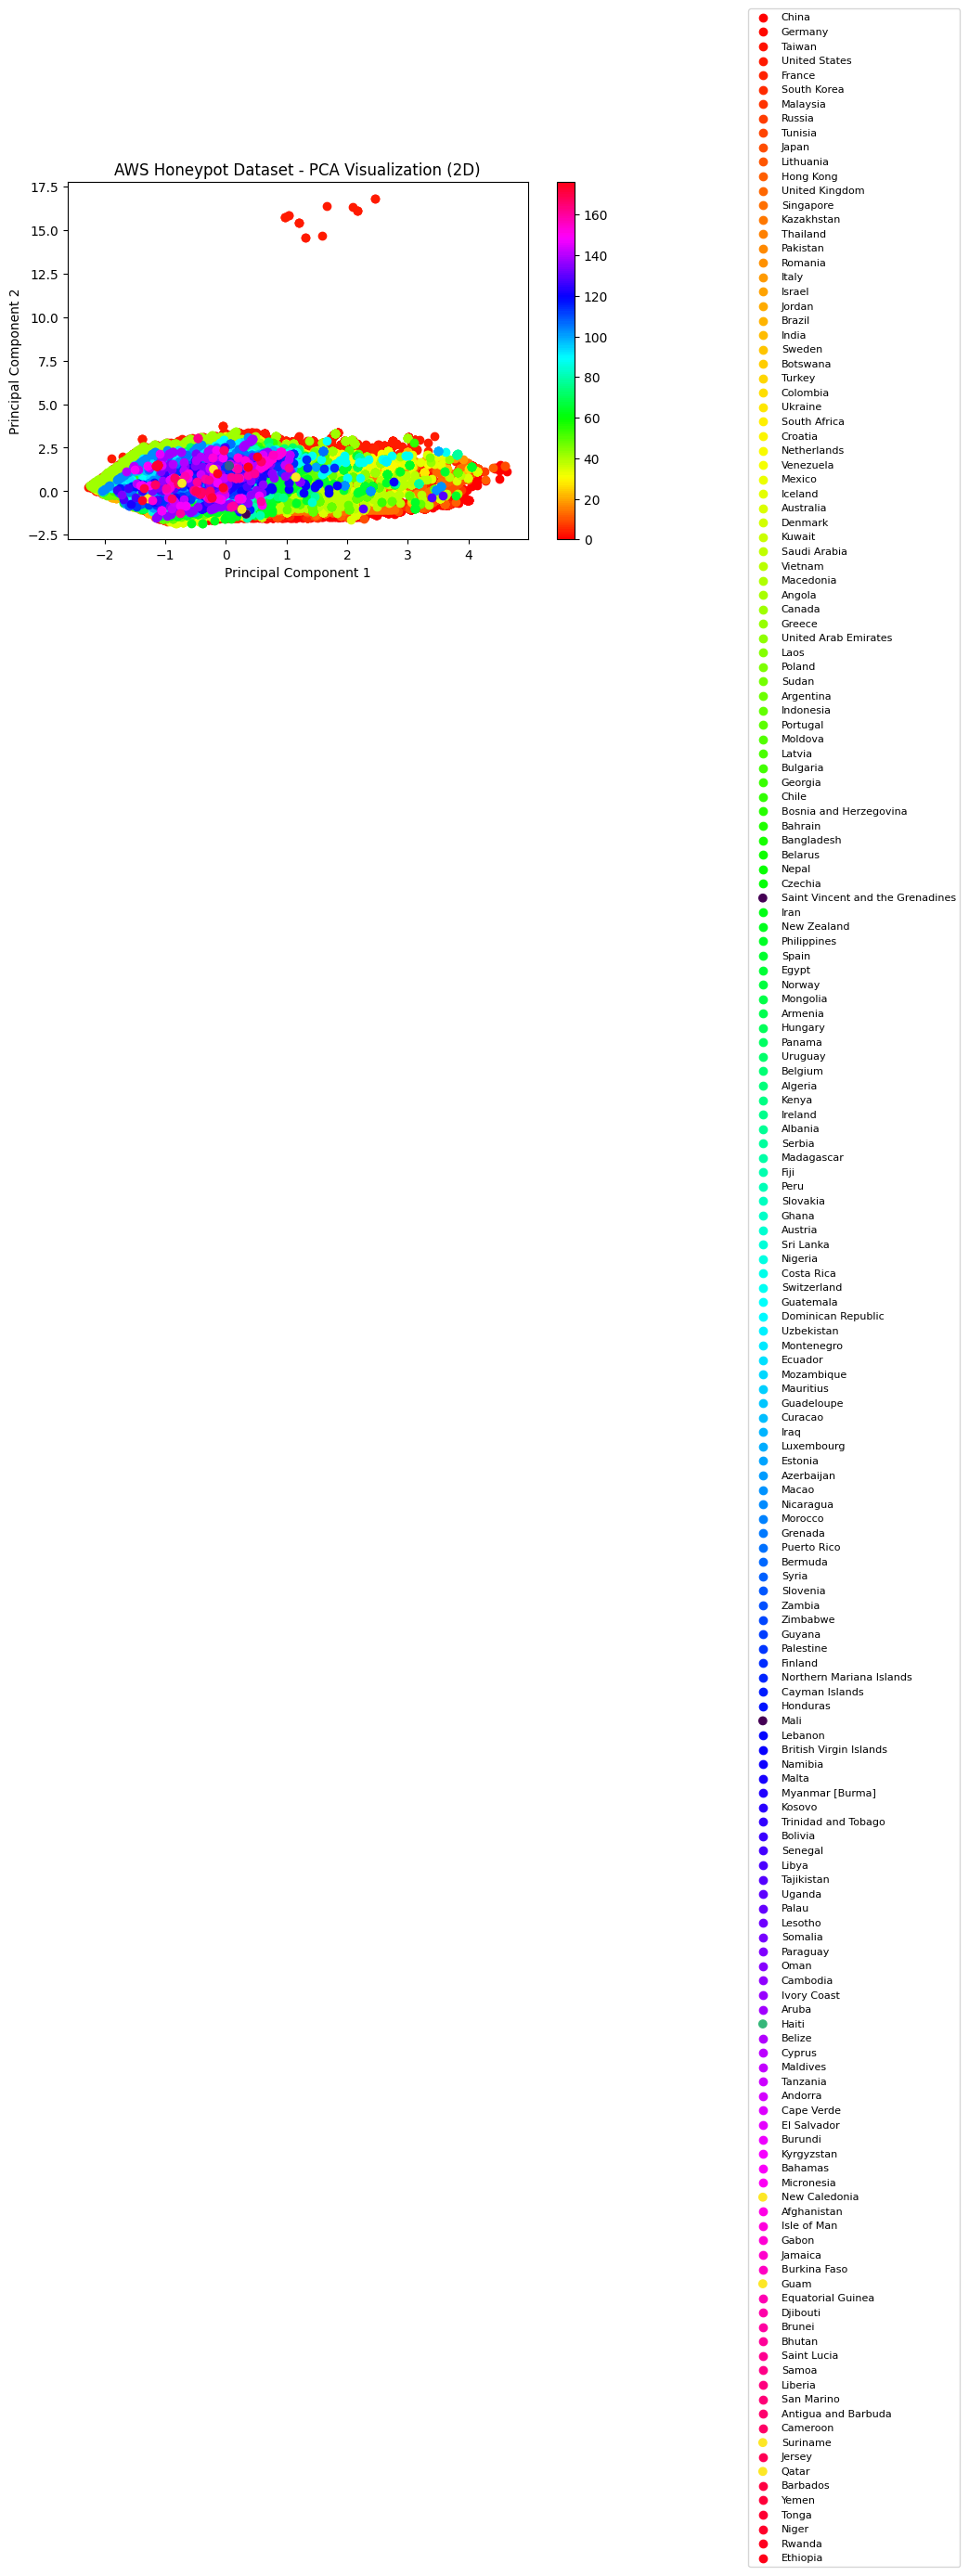

In [29]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Select the columns for PCA visualization
columns = ['host','spt', 'dpt', 'latitude', 'longitude']

# Separate the features from the target variable
A = t[columns]
A=A.dropna()
# Standardize the feature values
scaler = StandardScaler()
A_scaled = scaler.fit_transform(A)

# Perform PCA with 2 components
pca = PCA(n_components=2)
A_pca_2d = pca.fit_transform(A_scaled)

# Perform PCA with 3 components
pca = PCA(n_components=3)
A_pca_3d = pca.fit_transform(A_scaled)

# Create a color map for country column values
country_values = t['country'].unique()
color_map = plt.cm.get_cmap('hsv', len(country_values))

# Visualize the transformed data with color-coded data points in 2D
fig, ax = plt.subplots(figsize=(8, 5))
for i, country in enumerate(country_values):
    mask = t['country'] == country
    ax.scatter(A_pca_2d[mask, 0], A_pca_2d[mask, 1], c=color_map(i), marker='o', label=country)

# Set the plot labels and title
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_title('AWS Honeypot Dataset - PCA Visualization (2D)')

# Add legends and colorbar
ax.legend(bbox_to_anchor=(1.95, 1.50), fontsize="8")
sm = plt.cm.ScalarMappable(cmap=color_map, norm=plt.Normalize(vmin=0, vmax=len(country_values)-1))
sm.set_array([])
fig.colorbar(sm)

# Show the plot
plt.show()

* This code reads in the dataset dx, normalizes the values in each column (except for certain columns), drops any rows with missing values, and then checks for the presence of missing values in the resulting dataset.

* The normalization is done by dividing each value in a column by the maximum value in that column. This scales all the values in each column to lie between 0 and 1.

* The specific columns excluded from normalization are 'datetime', 'host', 'src', 'proto', and 'type'. This suggests that these columns may not contain numerical data that is amenable to normalization.

* The code then drops any rows in dx that contain missing values, and finally uses the isnull() and sum() methods to count the number of missing values in the resulting dataset.

In [30]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

# Read the dataset

dx= d

# Normalize the data
for col in dx.columns:
    if col != 'datetime' and col != 'host' and col != 'src' and col != 'proto' and col != 'type':
        dx[col] = dx[col].astype('float')
        dx[col] = dx[col] / dx[col].max()

dx = dx.dropna()
dx.isnull().sum()

host         0
src          0
proto        0
spt          0
dpt          0
cc           0
country      0
locale       0
latitude     0
longitude    0
year         0
month        0
day          0
dtype: int64

In [31]:
dx

,host,src,proto,spt,dpt,cc,country,locale,latitude,longitude,year,month,day
0,2,1032051418,1,0.091554,0.021878,0.193182,0.203390,0.330789,0.001422,0.649790,1.0,0.500000,0.096774
1,2,1347834426,2,0.080415,0.077252,0.232955,0.322034,1.000000,0.002540,0.050444,1.0,0.500000,0.096774
2,2,2947856490,1,0.037980,0.016489,0.903409,0.887006,0.865140,0.001247,0.681130,1.0,0.500000,0.096774
3,7,841842716,2,0.659724,0.029008,0.926136,0.954802,0.577608,0.002271,-0.688902,1.0,0.500000,0.096774
4,4,3587648279,1,0.863310,0.001221,0.306818,0.305085,1.000000,0.002434,0.013171,1.0,0.500000,0.096774
...,...,...,...,...,...,...,...,...,...,...,...,...,...
451576,2,1922977453,1,0.948730,0.006794,0.471591,0.451977,0.899915,0.001777,0.783287,1.0,0.666667,0.258065
451577,0,1017974360,1,0.091554,0.123511,0.193182,0.203390,0.022053,0.001587,0.657342,1.0,0.666667,0.258065
451578,2,3234358955,1,0.091554,0.021878,0.926136,0.954802,0.095844,0.001696,-0.662854,1.0,0.666667,0.258065
451579,6,28142724,1,0.054246,0.006794,0.903409,0.887006,0.865140,0.001247,0.681130,1.0,0.666667,0.258065


* This code is performing PCA (Principal Component Analysis) on the normalized dataset dx and visualizing the PCA dimensions in 3D and 2D.

* First, the code creates a 3D plot using the scatter function of matplotlib and the projection='3d' parameter. It then plots the transformed dataset pca_transformed on the x, y, and z axes, with the color of each point determined by the corresponding country value in the dx DataFrame.

* Next, the code creates a 2D scatter plot using the sns.scatterplot function from the seaborn library. It plots the first two principal components (PCA1 and PCA2) on the x and y axes, respectively, with the color of each point determined by the corresponding country value in the dx DataFrame.

* Finally, both the 3D and 2D plots are displayed using the plt.show() function.

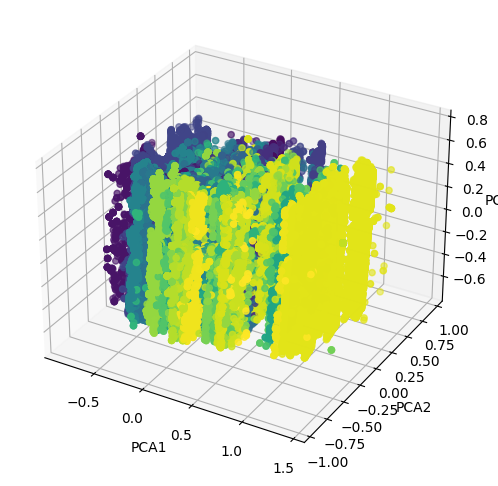

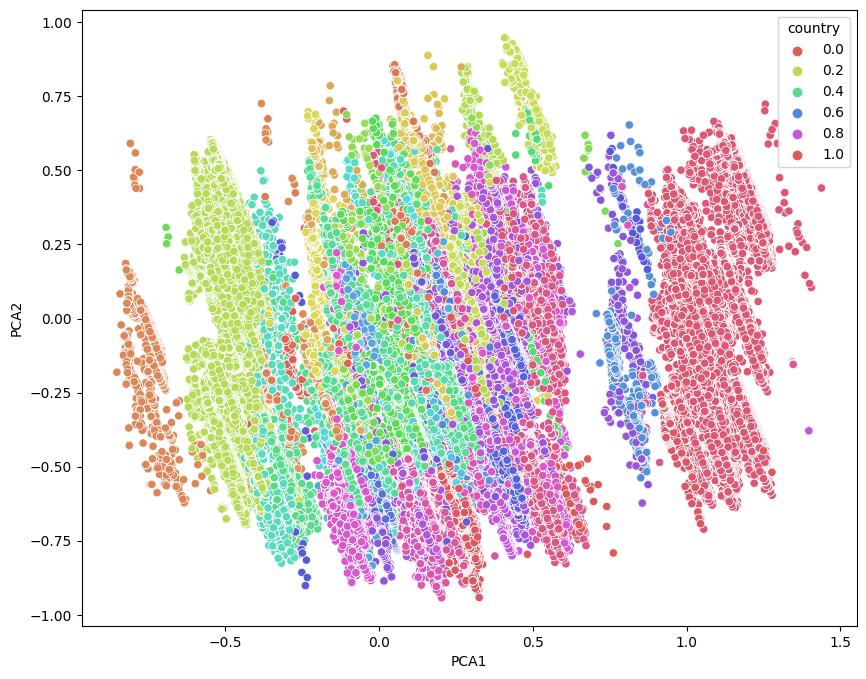

In [32]:
# Perform PCA
pca = PCA(n_components=3) 
pca_transformed = pca.fit_transform(dx.drop(['host', 'src', 'proto'], axis=1))
                                  
# Visualize PCA dimensions
fig = plt.figure(figsize=(8,6)) 
ax = fig.add_subplot(111, projection='3d') 
ax.scatter(pca_transformed[:,0], pca_transformed[:,1], pca_transformed[:,2], c=dx['country'], cmap='viridis')
ax.set_xlabel('PCA1') 
ax.set_ylabel('PCA2') 
ax.set_zlabel('PCA3')
plt.show() 

# 2D Visualization 
plt.figure(figsize=(10,8))
sns.scatterplot(x=pca_transformed[:,0], y=pca_transformed[:,1], hue=dx['country'], palette='hls')
plt.xlabel('PCA1') 
plt.ylabel('PCA2')
plt.show()